In [1]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus=False)
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('car_data1.csv')

In [3]:
df.head()

,Unnamed: 0,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Mileage_new
0,0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,38.00
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,19.67
2,2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,18.20
3,3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,20.77
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,15.20


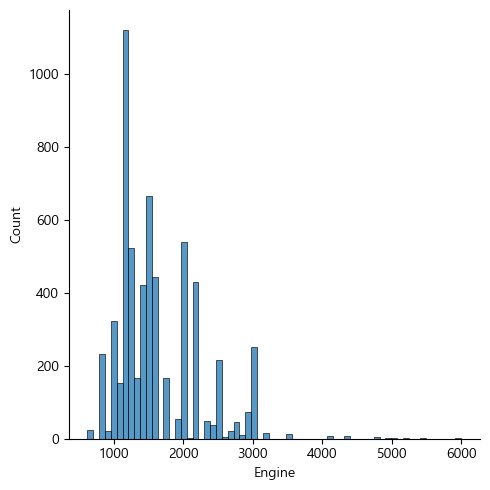

In [4]:
sns.displot(df, x = 'Engine')

In [5]:
df_norm = df.loc[df['Engine'] < 1000]
df_norm.value_counts().sum()

600

In [6]:
# 초소형 0
# 일반 600
# 소형 3494
# 중형차 761개
# 대형차 1196

In [21]:
df_small = df(df['Engine'] >= 1000 & df['Engine'] < 1600 )
df_small.value_counts().sum()
car_data['Engine'] >= 1000 & car_data['Engine'] < 1600)

SyntaxError: unmatched ')' (332803304.py, line 3)

In [24]:
cond1 = df['Engine'] > 1600
cond2 = df['Engine'] < 2000
df2 = df.loc[cond1 & cond2]
df2.value_counts().sum()

761

In [26]:
dfbig = df.loc[df['Engine'] > 2000]
dfbig.value_counts().sum()

1196

In [28]:
# Filter and create separate DataFrames based on the given conditions

# df_micro: Engine == 250
df_micro = df[df['Engine'] == 250]

# df_norm: Engine < 1000
df_norm = df[df['Engine'] < 1000]

# df_small: 1000 ≤ Engine < 1600
df_small = df[(df['Engine'] >= 1000) & (df['Engine'] < 1600)]

# df_middle: 1600 ≤ Engine < 2000
df_middle = df[(df['Engine'] >= 1600) & (df['Engine'] < 2000)]

# df_big: Engine ≥ 2000
df_big = df[df['Engine'] >= 2000]

# Display the number of entries in each category
len(df_micro), len(df_norm), len(df_small), len(df_middle), len(df_big)


(0, 600, 3494, 761, 1196)

In [30]:
df['Location'].value_counts()

Location
Mumbai        802
Hyderabad     732
Kochi         668
Coimbatore    656
Pune          606
Delhi         564
Kolkata       540
Chennai       489
Jaipur        413
Bangalore     354
Ahmedabad     227
Name: count, dtype: int64

<Axes: title={'center': 'Price'}, xlabel='Location'>

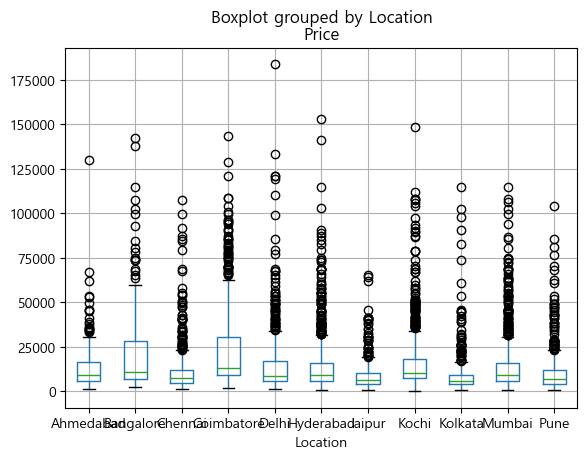

In [32]:
# 아노바 평균 비교 Location
df.boxplot(column = 'Price', by = 'Location') # 차이 있을듯?

In [34]:
df = pd.read_csv('car_data_re.csv')

<Axes: title={'center': 'Price'}, xlabel='Location'>

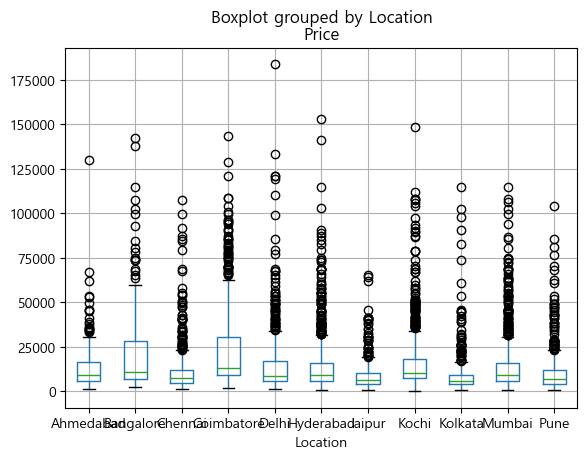

In [35]:
df.boxplot(column = 'Price', by = 'Location')

In [36]:
df['Location'].value_counts()
# 뭄바이가 많이 팔리더라, 

Location
Mumbai        802
Hyderabad     732
Kochi         668
Coimbatore    656
Pune          606
Delhi         564
Kolkata       540
Chennai       489
Jaipur        413
Bangalore     354
Ahmedabad     227
Name: count, dtype: int64

In [38]:

# Group data by 'Location' and calculate the 1st and 3rd quartiles for 'Price'
quartiles = df.groupby('Location')['Price'].quantile([0.25, 0.75]).unstack()

# Rename the columns for clarity
quartiles.columns = ['1QR', '3QR']

# Display the quartiles for each location
quartiles.value_counts()


1QR        3QR       
4119.8275  9197.7600     1
4138.9900  10286.1600    1
4368.9400  11842.1150    1
4445.5800  11880.4400    1
5595.3000  16134.4050    1
5618.2950  16862.5600    1
5855.9100  16096.0800    1
5978.5400  16709.2600    1
6898.3200  28263.9500    1
7446.3575  18142.5825    1
8940.9925  30758.8425    1
Name: count, dtype: int64

In [39]:
quartiles['minus'] = abs(quartiles['1QR'] - quartiles['3QR'])

quartiles

,1QR,3QR,minus
Location,,,
Ahmedabad,5978.5400,16709.2600,10730.7200
Bangalore,6898.3200,28263.9500,21365.6300
Chennai,4445.5800,11880.4400,7434.8600
Coimbatore,8940.9925,30758.8425,21817.8500
Delhi,5618.2950,16862.5600,11244.2650
Hyderabad,5595.3000,16134.4050,10539.1050
Jaipur,4138.9900,10286.1600,6147.1700
Kochi,7446.3575,18142.5825,10696.2250
Kolkata,4119.8275,9197.7600,5077.9325


In [40]:
# 지역별 Price의 값이 3QR - 1QR값 구함
# 차이가 1만이 넘는 애들로 할까?
# Ahmedabad ,Bangalore, Coimbatore, Delhi,Hyderabad ,Kochi,Mumbai ->
# Chennai, Jaipur, Kolkata, Pune
# 1QR 과 3QR의 차이가 의미하는 바?
# 가격의 상위 25%와 상위 75%의 차이
# 가격의 중간 차이가 크다는 것 => 중간 가격의 차량을 구매하는 고객이 많다
# 가격의 중간 차이가 작다는 것 => 중간 가격의 차량을 구매하는 고객이 적다


location_big = df[df['Location'].isin(['Ahmedabad', 'Bangalore', 'Coimbatore', 'Hyderabad', 'Mumbai'])]
print(location_big['Location'].value_counts())

location_small = df[df['Location'].isin(['Chennai', 'Jaipur' , 'Kolkata', 'Pune'])]
print(location_small['Location'].value_counts())


df['location_label'] = 0
df.loc[df['Location'].isin(['Ahmedabad', 'Bangalore', 'Coimbatore','Delhi', 'Hyderabad','Kochi', 'Mumbai']),'location_label'] = 'location_big'
df.loc[df['Location'].isin(['Chennai', 'Jaipur' , 'Kolkata', 'Pune']),'location_label'] = 'location_small'

df['location_label'].value_counts()

Location
Mumbai        802
Hyderabad     732
Coimbatore    656
Bangalore     354
Ahmedabad     227
Name: count, dtype: int64
Location
Pune       606
Kolkata    540
Chennai    489
Jaipur     413
Name: count, dtype: int64


location_label
location_big      4003
location_small    2048
Name: count, dtype: int64

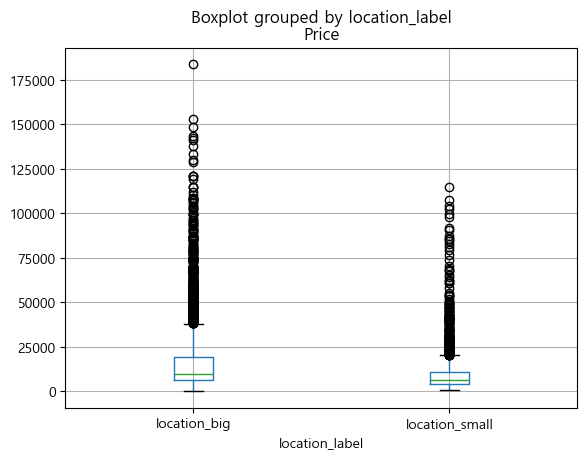

In [41]:
df.boxplot(column = 'Price' , by = 'location_label');
# df.boxplot(column = 'Price', by = 'Location')

<Axes: xlabel='location_label', ylabel='count'>

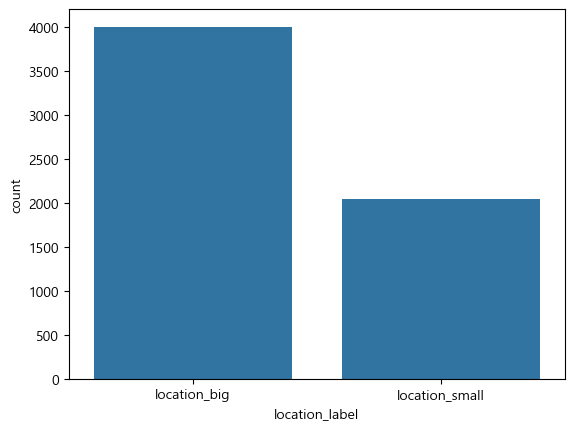

In [80]:
sns.countplot(data=df, x='location_label')

In [44]:

# df.to_csv('df_with_location.csv', index=False)


In [47]:
# 상자?
# 2,4,kochi, Mumbai
# 분포묶기

std_Price = np.std(df['Price'])
print(std_Price)

quantile1 = std_Price * 3
print(quantile1)

quantile3 = std_Price * -3
print(quantile3)

17373.509940758806
52120.52982227642
-52120.52982227642


In [49]:
np.std(quartiles)

1QR      1456.734768
3QR      6591.039537
minus    5299.846216
dtype: float64

In [51]:
df.groupby('Location')['Price']

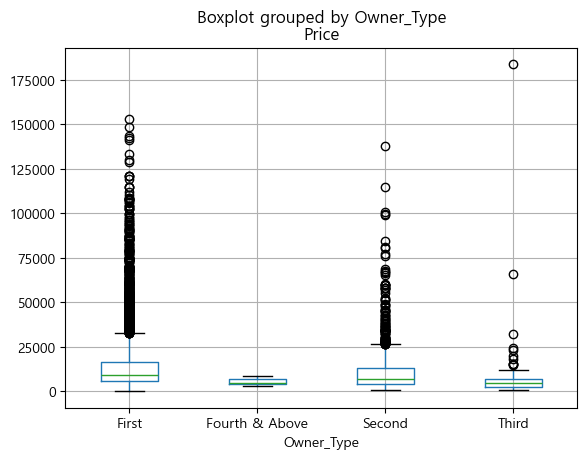

In [53]:
df.boxplot(column = 'Price', by = 'Owner_Type');

In [54]:
df['Owner_Type'].value_counts()

Owner_Type
First             5003
Second             939
Third              102
Fourth & Above       7
Name: count, dtype: int64

In [57]:
df.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Price', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'Mileage_new', 'Brand', 'Name_new', 'location_label'],
      dtype='object')

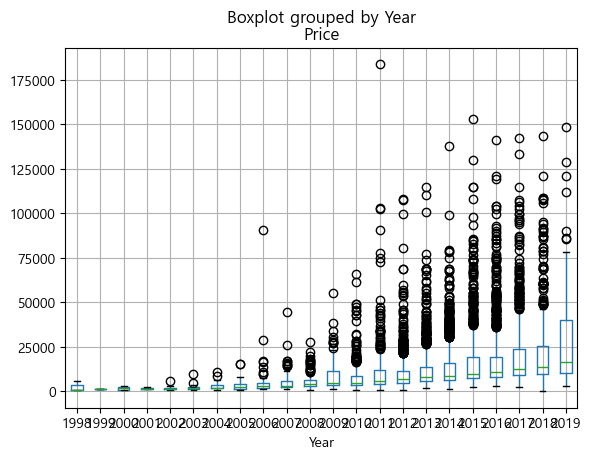

In [59]:
df.boxplot(column = 'Price', by = 'Year');

In [60]:
df['Year'].value_counts()

Year
2014    804
2016    765
2015    759
2013    654
2017    635
2012    572
2011    463
2010    332
2018    331
2009    189
2008    160
2019    108
2007    107
2006     66
2005     43
2004     25
2003     14
2002     11
2000      4
2001      4
1998      3
1999      2
Name: count, dtype: int64

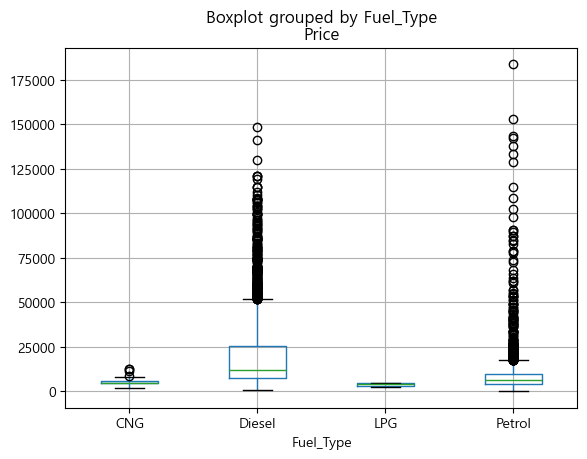

In [61]:
df.boxplot(column = 'Price', by = 'Fuel_Type');

In [63]:
df['Fuel_Type'].value_counts()

Fuel_Type
Diesel    3251
Petrol    2734
CNG         56
LPG         10
Name: count, dtype: int64

In [84]:
df.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Price', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'Mileage_new', 'Brand', 'Name_new', 'location_label',
       'Fuel_Type_label'],
      dtype='object')

In [86]:
df['Seats'].value_counts()

Seats
5.0     5066
7.0      697
8.0      135
4.0      102
6.0       30
2.0       14
10.0       4
9.0        3
Name: count, dtype: int64

In [90]:
df = pd.read_csv('data_dummies.csv')